In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics

from sklearn.metrics import confusion_matrix, pair_confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Checking the class distribution fro the variable count
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

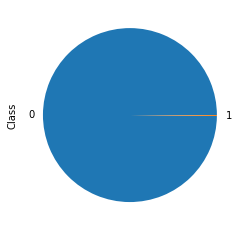

In [ ]:
3#Checking the distribution of class variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) * 100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) * 100).plot.pie()

In [ ]:
Classes = df['Class'].value_counts()
normal_share = Classes[0]/df['Class'].count()*100
fraud_share = Classes[1]/df['Class'].count()*100

print('normal trasaction percentage: ', normal_share)
print('fraud trasaction percentage: ', fraud_share)

normal trasaction percentage:  99.82725143693798
fraud trasaction percentage:  0.1727485630620034


In [ ]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

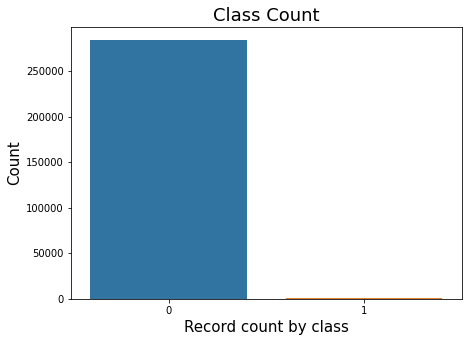

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(x = df['Class'])
plt.title('Class Count', fontsize = 18)
plt.xlabel('Record count by class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [ ]:
#Checking the corelation. negative sign mean negative corelation and positive sign mean positive corelation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


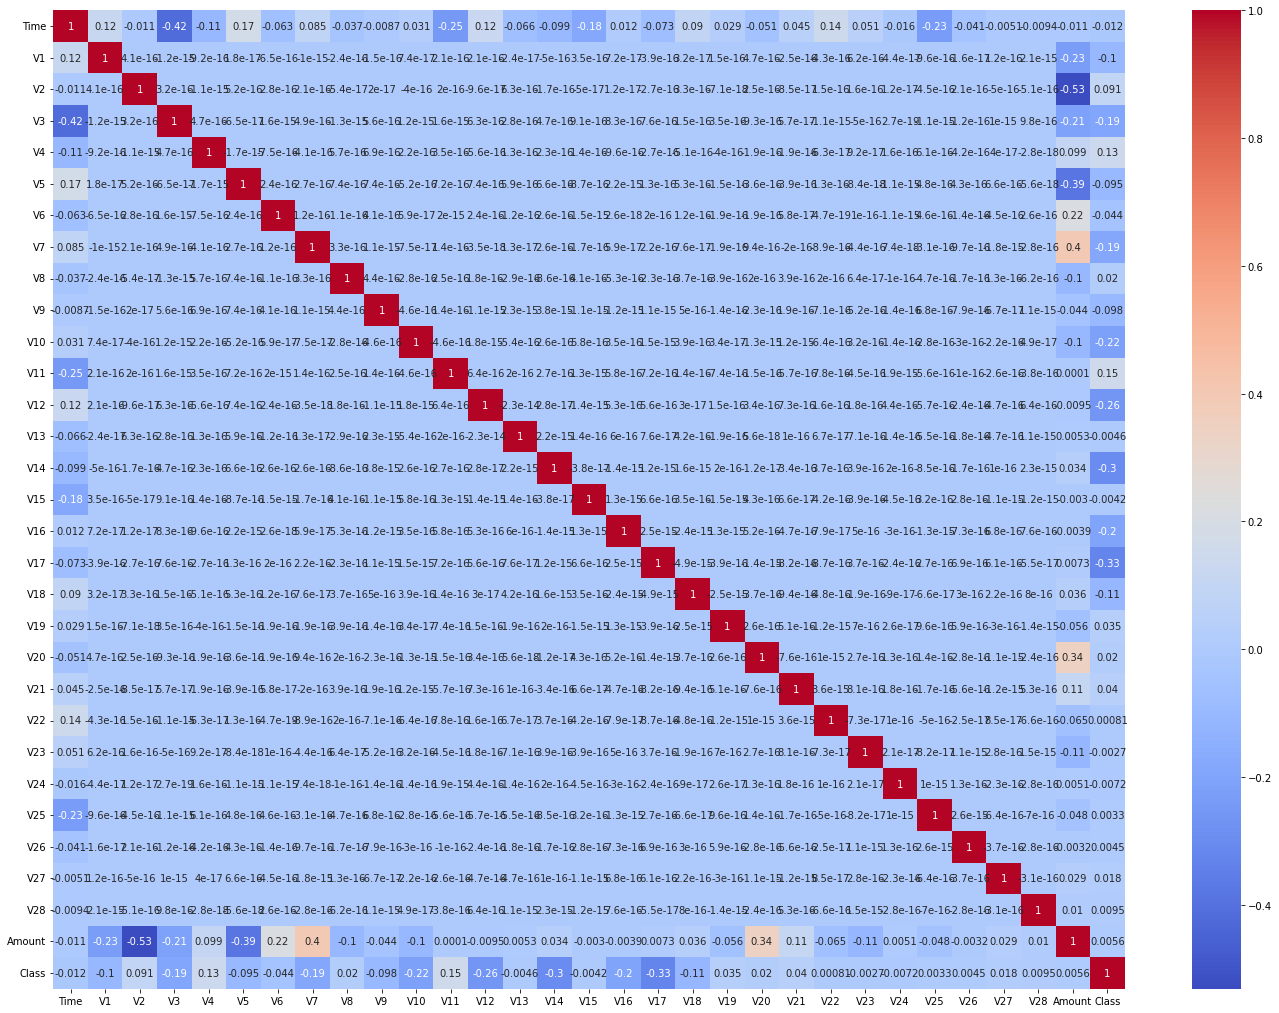

In [ ]:
plt.figure(figsize = (24,18))

sns.heatmap(corr, cmap = 'coolwarm', annot=True)
plt.show()

In the above figure, dark blue colour shows strongly corelated and light blue shows not strongly corelated

##FEATURE ENGINEERING

Next we will do feature engineering. It means creating new feature from existing feature. In this dataset, the feature time contain the seconds elapsed between first transaction and subsequent transactions. So for that we will use a Pandas function TimeDelta which represents the duration between two time.

In [ ]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)


In [ ]:
#Drop unnecessary coloumns
#We will drop time as we have derived day/hour/minute from the coloumn
df.drop('Time', axis=1, inplace=True)
#We will only keep derived column hour, as day and minute might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_Hour'],
      dtype='object')

##Splitting the dataset into training and test data

In [ ]:
#Splitting the dataset into train and test data
y = df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Splitting dataset using train_test_split.Test size is 20% and train size is 80%.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)


In [ ]:
XGBmodel = SGDClassifier(loss='log', random_state=42)
XGBmodel.fit(X_train, y_train)



SGDClassifier(loss='log', random_state=42)

Keep X_test, y_test to evaluate the test data once the model is built.

In [ ]:
#Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [ ]:
#Accumulating all the column names under one variable
cols = list(X.columns.values)

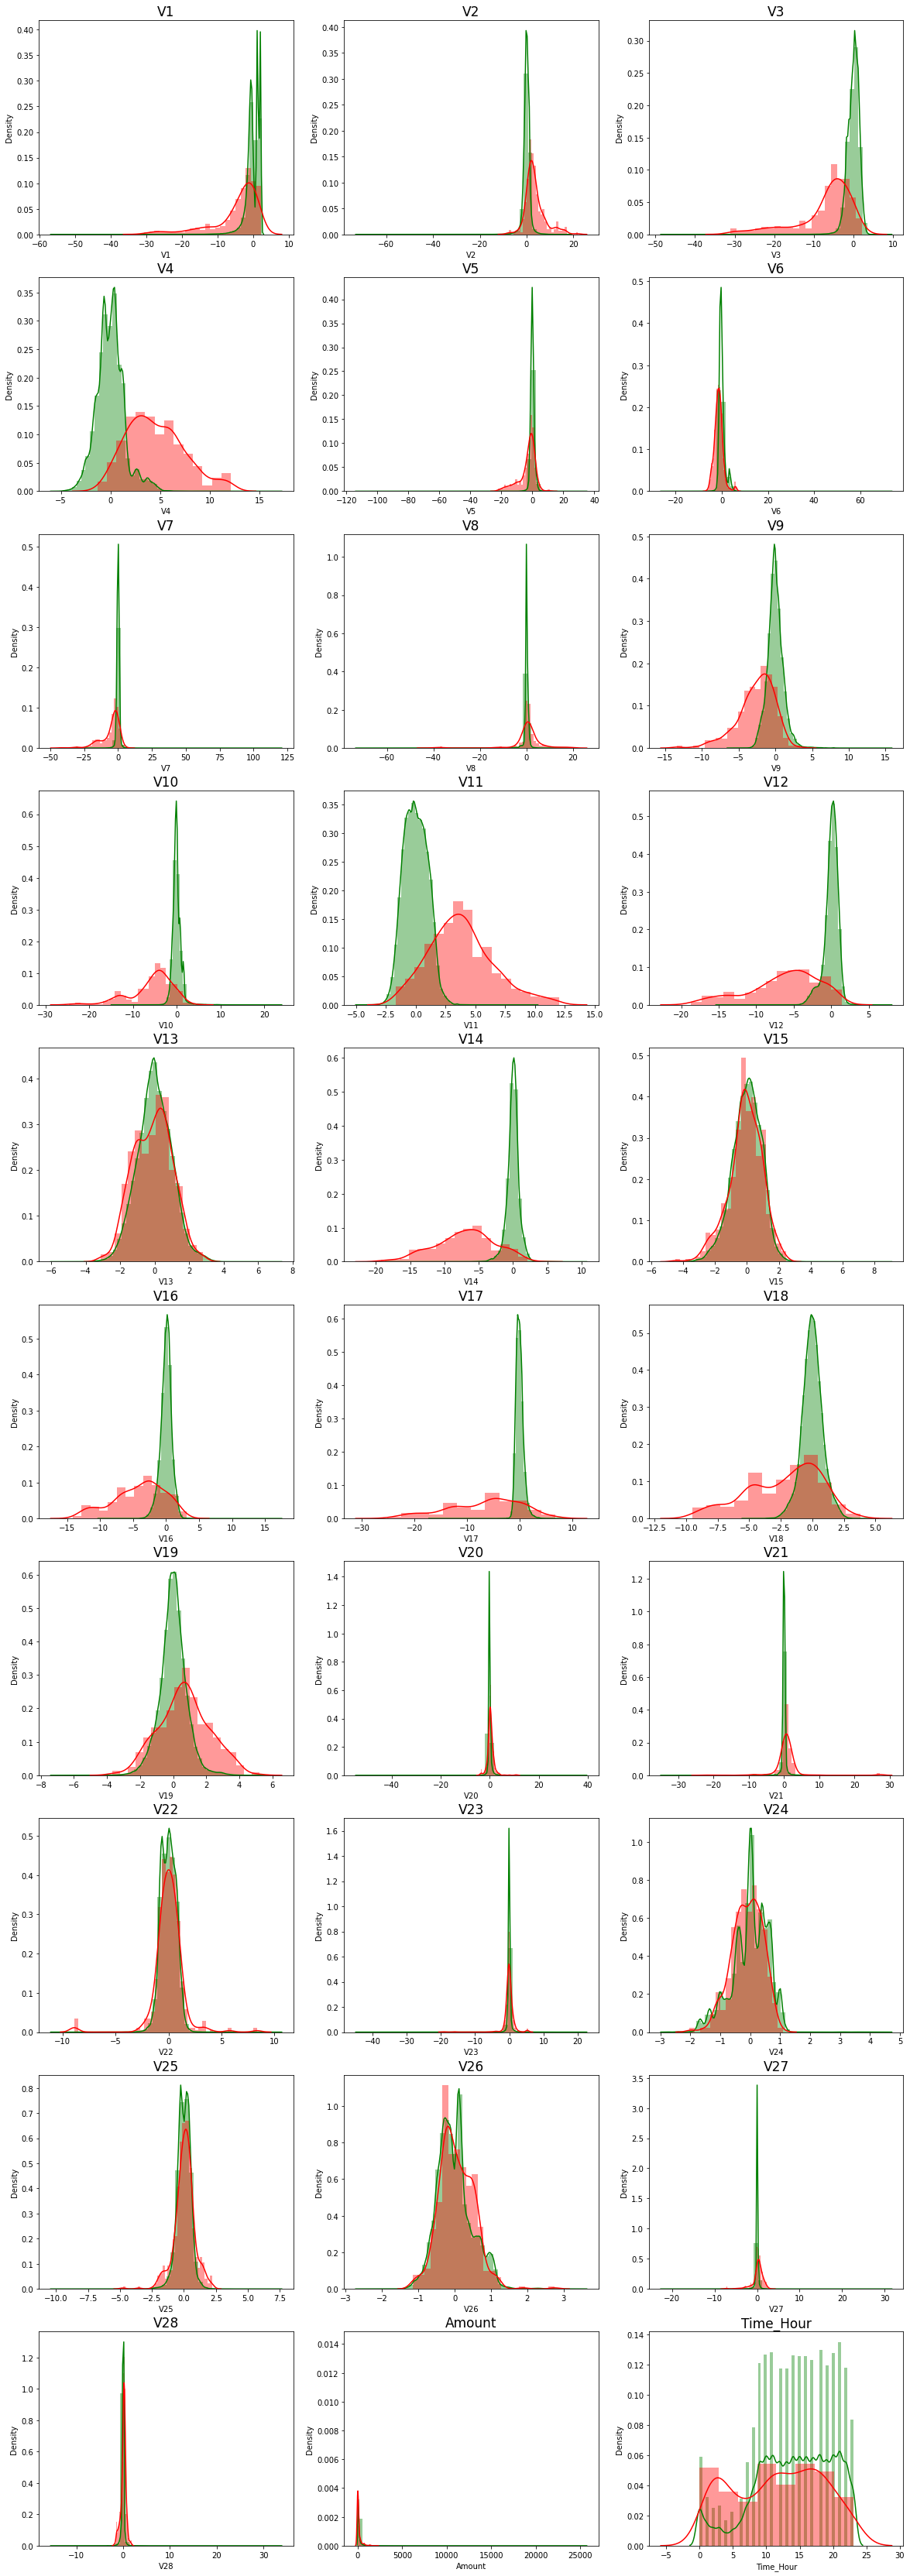

In [ ]:
#plot the histogram of a variable from the dataset to see the skewness

normal_records = df.Class == 0
fraud_records = df.Class == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n+1)
    sns.distplot(X[col][normal_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

#Confusion matrix
#Classification report

#create a dataframe to show the result

In [ ]:
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])

created a dataframe pd_results with different coloumn names. this dataframe will be required to store the result

#Now we will create a common function to plot confusion matrix
TN(true negative)- observation is negative and the model classified it as negative.

FP(flase positive)- observation is negative but the mmodel classified it as positive.

FN(false negative)- observation is positive but the model classified it as negative.

TP(true positive)-observation is positive and the model classified it as positive.

In [ ]:
def plot_confusion_matrix(y_test, pred_test):    #y_test is actual value and pred_test is predicted value
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non_Fraudalent', 'Fradulent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    labels = [['TN', 'FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(labels[i][j]) + "=" + str(cm[i][j]), fontsize=12)
    plt.show()

  Logistic Regression- predict categorical dependent variable using a given set of independent variable.

  XGBoost- implement machine learning algorithms under Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

  

In [ ]:
#Create a common function to fit and predict a logistic regression model for both L1 and L2.
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    num_c = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs = num_c,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs = num_c,
        penalty='l1',#Specify the norm of the penalty
        scoring='roc_auc',
        cv=cv_num,  #cross validation generator
        random_state=42,
        max_iter=10000,
        fit_intercept=True,    #Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
        solver='liblinear',    #solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
        tol=10                 #tolerance for the stopping criteria
    )
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print('parameters for l1 regularisations')
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print('parameters for l2 regularisations')
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    #find predicted values
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    #find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict(X_test)
    y_pred_probs_l2 = searchCV_l2.predict(X_test)


    #Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)


    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    pair_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [ ]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    XGBmodel = SGDClassifier(loss='log', random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

#Perform Cross-validation with StratifiedKFold



In [ ]:
#Lets perfrom StratifiedKFold and check the results

#Lets perfrom StratifiedKFold and check the results

skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


XGBoost Model
Model Accuracy: 0.998700865504468
Confusion Matrix


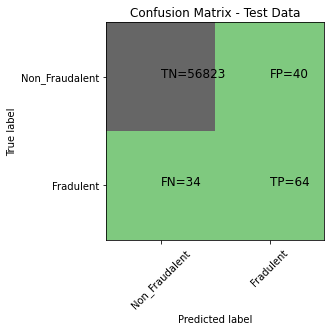

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.62      0.65      0.63        98

    accuracy                           1.00     56961
   macro avg       0.81      0.83      0.82     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.8886613259868779
XGBoost threshold: 3.398188576192401e-13
ROC for the test dataset 88.9%


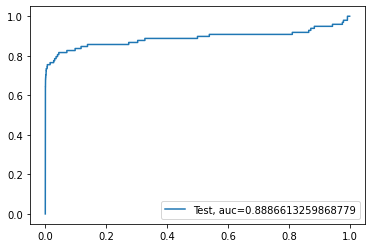

Time Taken by Model: --- 4.22749137878418 seconds ---
------------------------------------------------------------


In [ ]:
##Run Logistic Regression with L1 And L2 Regularisation
#print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
#print('-'*60 )


#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,StratifiedKFold Cross Validation,XGBoost,0.998701,0.888661,3.398189e-13


#Proceed with model which shows best result
-Apply the best hyperparameter on the model

-Predict on the test dataset

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)


#find predicted vallues
y_pred_l2 = clf.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9824998302436573
Parameters for l2 regularisations
[[ 0.00683334  0.06145934 -0.06703104  0.21837008  0.05400372 -0.0319603
  -0.02280335 -0.1149601  -0.06954056 -0.16366435  0.12779    -0.19159896
  -0.03711445 -0.36059637  0.00364854 -0.08799108 -0.07288165 -0.0007583
   0.00394511 -0.0279599   0.03822224  0.02337054 -0.01173993 -0.00997821
  -0.00657592  0.00627513 -0.01025023 -0.00174467  0.00039791 -0.00096784]]
[-7.40641365]
{1: array([[0.69243733, 0.69420152, 0.71447107, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99464431, 0.99129517, 0.99071237,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601,
        0.99096601, 0.99096601, 0.99096601, 0.99096601, 0.99096601],
       [0.60700243, 0.60865586, 0.62914551, 0.76884136, 0.90900227,
        0.94879974, 0.9604112 , 0.98181412, 0.98547001, 0.98328227,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.97955152,
        0.97955152, 0.97955152, 0.97955152, 0.97955152, 0.9795

In [ ]:
# Checking for the coefficient values
clf.coef_

array([[ 0.00683334,  0.06145934, -0.06703104,  0.21837008,  0.05400372,
        -0.0319603 , -0.02280335, -0.1149601 , -0.06954056, -0.16366435,
         0.12779   , -0.19159896, -0.03711445, -0.36059637,  0.00364854,
        -0.08799108, -0.07288165, -0.0007583 ,  0.00394511, -0.0279599 ,
         0.03822224,  0.02337054, -0.01173993, -0.00997821, -0.00657592,
         0.00627513, -0.01025023, -0.00174467,  0.00039791, -0.00096784]])

In [ ]:
# Creating a dataframe with the coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

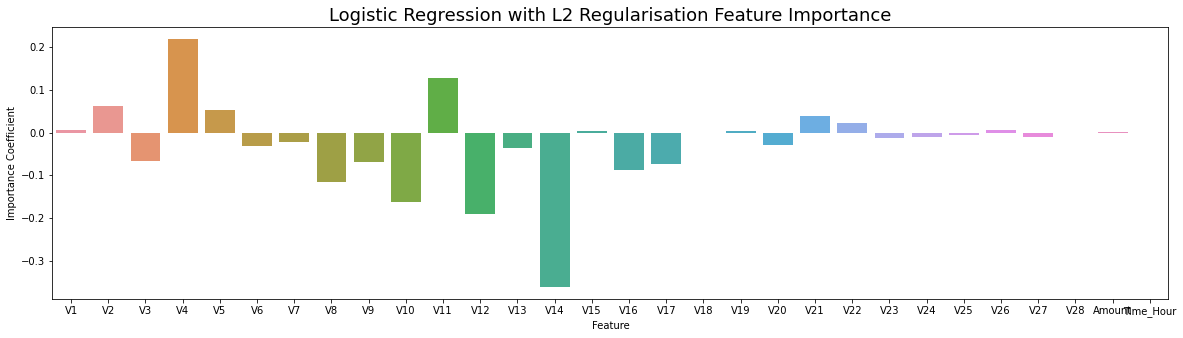

In [ ]:
# Plotting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

Hence it implies that V2, V4, V5,V11 has + ve importance whereas V10, V12, V14 seems to have -ve impact on the predictaions

# Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## <a name="p4-3">Oversampling with RandomOverSampler with StratifiedKFold Cross Validation</a>

- We will use Random Oversampling method to handle the class imbalance

In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

XGBoost Model
Model Accuracy: 0.9110619546707396
Confusion Matrix


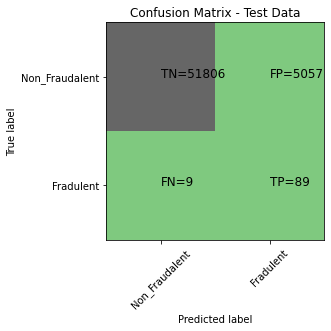

classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56863
           1       0.02      0.91      0.03        98

    accuracy                           0.91     56961
   macro avg       0.51      0.91      0.49     56961
weighted avg       1.00      0.91      0.95     56961

XGboost roc_value: 0.9303202613370409
XGBoost threshold: 1.0
ROC for the test dataset 93.0%


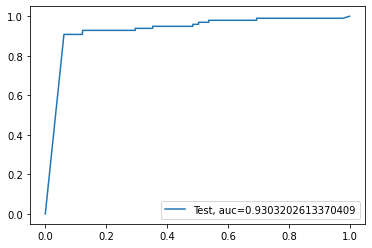

Time Taken by Model: --- 13.56758165359497 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
#print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
#print('-'*60 )


#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,StratifiedKFold Cross Validation,XGBoost,0.998701,0.888661,3.398189e-13
1,Random Oversampling with StratifiedKFold CV,XGBoost,0.911062,0.930320,1.000000e+00


### Results for Random Oversampling with StratifiedKFold technique:
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

In [ ]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

XGBoost Model
Model Accuracy: 0.8669967170520181
Confusion Matrix


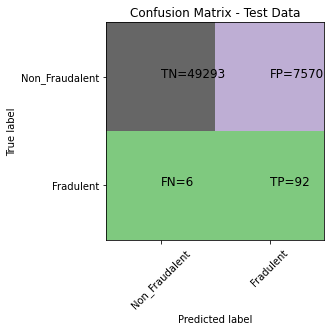

classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     56863
           1       0.01      0.94      0.02        98

    accuracy                           0.87     56961
   macro avg       0.51      0.90      0.48     56961
weighted avg       1.00      0.87      0.93     56961

XGboost roc_value: 0.9370947788221385
XGBoost threshold: 1.0
ROC for the test dataset 93.7%


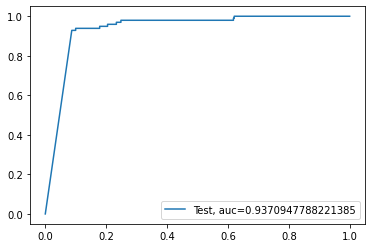

Time Taken by Model: --- 18.6077663898468 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
#print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
#print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,StratifiedKFold Cross Validation,XGBoost,0.998701,0.888661,3.398189e-13
1,Random Oversampling with StratifiedKFold CV,XGBoost,0.911062,0.930320,1.000000e+00
2,SMOTE Oversampling with StratifiedKFold CV,XGBoost,0.866997,0.937095,1.000000e+00


### Results for SMOTE Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling with StratifiedKFold technique

## <a name="p4-5">Oversampling with ADASYN Oversampling</a>
- We will use ADASYN Oversampling method to handle the class imbalance

In [ ]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

XGBoost Model
Model Accuracy: 0.8090447850283528
Confusion Matrix


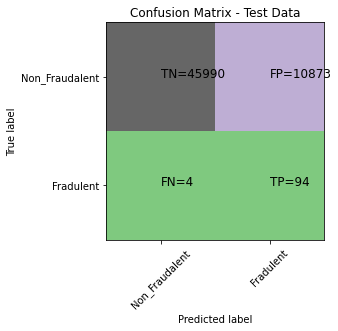

classification Report
              precision    recall  f1-score   support

           0       1.00      0.81      0.89     56863
           1       0.01      0.96      0.02        98

    accuracy                           0.81     56961
   macro avg       0.50      0.88      0.46     56961
weighted avg       1.00      0.81      0.89     56961

XGboost roc_value: 0.9228815983421664
XGBoost threshold: 1.0
ROC for the test dataset 92.3%


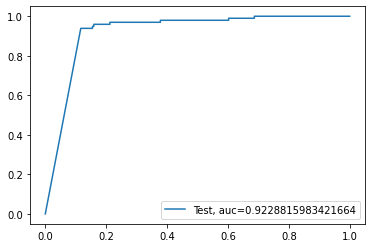

Time Taken by Model: --- 52.64759874343872 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
#print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
#print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,StratifiedKFold Cross Validation,XGBoost,0.998701,0.888661,3.398189e-13
1,Random Oversampling with StratifiedKFold CV,XGBoost,0.911062,0.930320,1.000000e+00
2,SMOTE Oversampling with StratifiedKFold CV,XGBoost,0.866997,0.937095,1.000000e+00
3,ADASYN Oversampling with StratifiedKFold CV,XGBoost,0.809045,0.922882,1.000000e+00


## Results for ADASYN  Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling with StratifiedKFold technique

## Overall conclusion after running the models on Oversampled data :
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

## <a name="p5">Hyperparameter Tuning</a>

## HPT - Xgboost Regression

In [ ]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':range(60,130,150),
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1,max_delta_step=0,
              missing=None, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, verbosity=1),
              param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 90.50503936, 246.13529201, 130.42927909,  93.41180921,
         178.9864326 ]),
  'std_fit_time': array([ 1.03436664,  3.89017398,  1.71548633,  1.41222945, 32.33005317]),
  'mean_score_time': array([0.023032  , 0.02910709, 0.01683178, 0.02245212, 0.02381153]),
  'std_score_time': array([0.00662317, 0.012342  , 0.00307745, 0.00903539, 0.00771915]),
  'param_subsample': masked_array(data=[0.8, 0.9, 0.8, 0.9, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 3, 3, 5, 3],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[3, 9, 5, 3, 7],
               mask=[False, False, False

Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be different, the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [ ]:
# Creating XGBoost model with selected hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=1, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(X_over, y_over )
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993328768806727
XGboost roc_value: 0.9755304281289041
XGBoost threshold: 0.023401951417326927


### Print the important features of the best model to understand the dataset

In [ ]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 10
3rd Top var = 17


In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9755304281289041
XGBoost threshold: 0.023401951417326927


In [ ]:
print(gsearch1)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=No...
                                           n_estimators=100, n_jobs=-1,
                                           nthread=None, num_paral

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

<Axes: xlabel='Class', ylabel='Density'>

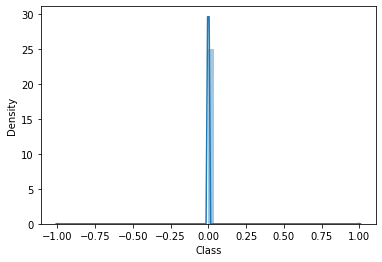

In [ ]:
sns.distplot(y_test-predictions)

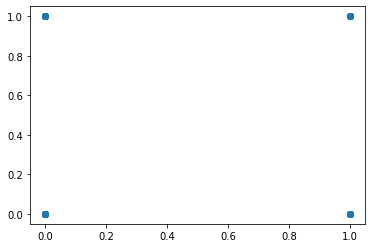

In [ ]:
plt.scatter(y_test, predictions)

## <a name="p6">Conclusion</a>

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices :

XGboost roc_value: 0.9815403079438694
XGBoost threshold: 0.01721232570707798

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKFold cross validation (without any oversampling or undersampling) gave us the best result.

In [ ]:
import pickle

In [ ]:
XGBmodel.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [ ]:
pickle.dump(XGBmodel, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [ ]:
if pred == 0:
  print('Normal Transaction')
else:
  print('Fraud Transaction')

Normal Transaction
